<a href="https://colab.research.google.com/github/SivaKrishnaDulla96/Feature_Engineering/blob/main/Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Case: Delhivery: Feature Engineering By Siva Krishna**

**Disclaimer:** This analysis is based on the data provided and reflects the state of the dataset as of the time of the analysis. The insights and recommendations are derived solely from my point of view and the dataset in question and do not necessarily represent the broader operations or circumstances of the company. The analysis assumes the accuracy of the data as received and has not been independently verified. Future analyses may yield different insights as new data becomes available or as business conditions change.

**Note on Results:** Due to the large volume of results generated by this analysis, only a subset has been presented here to illustrate the key trends and patterns For a complete view of the data and to explore additional insights, please refer to the full dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving delhivery_data.csv to delhivery_data.csv


In [ ]:
df = pd.read_csv('delhivery_data.csv')
df.head()


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


***1. Data Cleaning and Exploration***

 **The data type of all columns in the table.**




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**Number of rows and columns given in the dataset**

In [ ]:
df.shape

(144867, 24)

***Missing values and the number of missing values in each column***

In [ ]:
# check percentage of missing values in dataset
missing_values = df.isnull().sum()
missing_values

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


***Summary of Findings***

***Shape: The dataset has 144867 rows and 24 columns. Data Types: The dataset contains a mix of integer and object data types.***

***Memory Usage: The dataset uses a total of 25.6+ MB bytes of memory.***

***Missing Values: There are no missing values***

***Key Observations:***
Time Columns (trip_creation_time, od_start_time, od_end_time, cutoff_timestamp) were successfully converted to datetime format.
No columns with remaining missing values.

***Summary Statistics:***
Most columns have uniform data (e.g., single unique values in some fields like route_schedule_uuid, trip_uuid, etc.).
Numeric columns (e.g., actual_distance_to_destination, start_scan_to_end_scan) show consistent values across the dataset.

***2.  Merging the rows***

**1. Grouping by segment**

**a. Create a unique identifier for different segments of a trip based on the
combination of the trip_uuid, source_center, and destination_center and
name it as segment_key.**

In [ ]:
# Creating a unique identifier for different segments of a trip
df['segment_key'] = df['trip_uuid'] + "_" + df['source_center'] + "_" + df['destination_center']

# Display a sample of the dataframe to verify the new column
print(df[['trip_uuid', 'source_center', 'destination_center', 'segment_key']].head())


                 trip_uuid source_center destination_center  \
0  trip-153741093647649320  IND388121AAA       IND388620AAB   
1  trip-153741093647649320  IND388121AAA       IND388620AAB   
2  trip-153741093647649320  IND388121AAA       IND388620AAB   
3  trip-153741093647649320  IND388121AAA       IND388620AAB   
4  trip-153741093647649320  IND388121AAA       IND388620AAB   

                                         segment_key  
0  trip-153741093647649320_IND388121AAA_IND388620AAB  
1  trip-153741093647649320_IND388121AAA_IND388620AAB  
2  trip-153741093647649320_IND388121AAA_IND388620AAB  
3  trip-153741093647649320_IND388121AAA_IND388620AAB  
4  trip-153741093647649320_IND388121AAA_IND388620AAB  


**b. Use inbuilt functions like groupby and aggregations like
cumsum() to merge the rows in columns segment_actual_time,
segment_osrm_distance, segment_osrm_time based on the
segment_key.**

In [ ]:
# Aggregating columns using cumsum() after grouping by 'segment_key'
df['cumulative_segment_actual_time'] = df.groupby('segment_key')['segment_actual_time'].cumsum()
df['cumulative_segment_osrm_time'] = df.groupby('segment_key')['segment_osrm_time'].cumsum()
df['cumulative_segment_osrm_distance'] = df.groupby('segment_key')['segment_osrm_distance'].cumsum()

# Display a sample of the dataframe to verify the new cumulative columns
df[['segment_key', 'segment_actual_time', 'cumulative_segment_actual_time',
    'segment_osrm_time', 'cumulative_segment_osrm_time',
    'segment_osrm_distance', 'cumulative_segment_osrm_distance']].head()


,segment_key,segment_actual_time,cumulative_segment_actual_time,segment_osrm_time,cumulative_segment_osrm_time,segment_osrm_distance,cumulative_segment_osrm_distance
0,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,14.0,11.0,11.0,11.9653,11.9653
1,trip-153741093647649320_IND388121AAA_IND388620AAB,10.0,24.0,9.0,20.0,9.7590,21.7243
2,trip-153741093647649320_IND388121AAA_IND388620AAB,16.0,40.0,7.0,27.0,10.8152,32.5395
3,trip-153741093647649320_IND388121AAA_IND388620AAB,21.0,61.0,12.0,39.0,13.0224,45.5619
4,trip-153741093647649320_IND388121AAA_IND388620AAB,6.0,67.0,5.0,44.0,3.9153,49.4772


**2. Aggregating at segment level**

**a. Create a dictionary named create_segment_dict, that defines how to
aggregate and select values.**

**1. Keep the first and last values for some
numeric/categorical fields if aggregating them won’t make sense.**

In [ ]:
# Creating a dictionary that defines aggregation rules for each column
create_segment_dict = {
    'segment_actual_time': 'sum',  # Sum up segment times
    'segment_osrm_time': 'sum',   # Sum up OSRM times
    'segment_osrm_distance': 'sum',  # Sum up OSRM distances
    'source_name': 'first',       # Keep the first source name (categorical)
    'destination_name': 'last',   # Keep the last destination name (categorical)
    'trip_creation_time': 'first',  # Keep the first trip creation time
    'od_start_time': 'first',     # Keep the first trip start time
    'od_end_time': 'last',        # Keep the last trip end time
    'is_cutoff': 'max',           # Use max to check if any part of the segment was cutoff
    'cutoff_factor': 'mean',      # Use mean for cutoff factor
    'factor': 'mean',             # Use mean for the factor field
}

# Display the aggregation rules dictionary
create_segment_dict


{'segment_actual_time': 'sum',
 'segment_osrm_time': 'sum',
 'segment_osrm_distance': 'sum',
 'source_name': 'first',
 'destination_name': 'last',
 'trip_creation_time': 'first',
 'od_start_time': 'first',
 'od_end_time': 'last',
 'is_cutoff': 'max',
 'cutoff_factor': 'mean',
 'factor': 'mean'}

**b. Further group the data by segment_key to perform
aggregation operations for different segments of each trip based on the
segment_key value.**

In [ ]:
# Grouping data by 'segment_key' and aggregating using the rules in create_segment_dict
aggregated_data = df.groupby('segment_key').agg(create_segment_dict).reset_index()

# Display a sample of the aggregated data to verify the results
print(aggregated_data.head())


                                         segment_key  segment_actual_time  \
0  trip-153671041653548748_IND209304AAA_IND000000ACB                728.0   
1  trip-153671041653548748_IND462022AAA_IND209304AAA                820.0   
2  trip-153671042288605164_IND561203AAB_IND562101AAA                 46.0   
3  trip-153671042288605164_IND572101AAA_IND561203AAB                 95.0   
4  trip-153671043369099517_IND000000ACB_IND160002AAC                608.0   

   segment_osrm_time  segment_osrm_distance  \
0              534.0               670.6205   
1              474.0               649.8528   
2               26.0                28.1995   
3               39.0                55.9899   
4              231.0               317.7408   

                          source_name                    destination_name  \
0  Kanpur_Central_H_6 (Uttar Pradesh)       Gurgaon_Bilaspur_HB (Haryana)   
1  Bhopal_Trnsport_H (Madhya Pradesh)  Kanpur_Central_H_6 (Uttar Pradesh)   
2   Doddablpur_ChikaDPP

**c. The aggregation functions specified in the create_segment_dict are
applied to each group of rows with the same segment_key.**

In [ ]:
# Apply aggregation functions to groups defined by 'segment_key'
aggregated_data = df.groupby('segment_key').agg(create_segment_dict).reset_index()

# Display the first few rows of the aggregated data
print(aggregated_data.head())


                                         segment_key  segment_actual_time  \
0  trip-153671041653548748_IND209304AAA_IND000000ACB                728.0   
1  trip-153671041653548748_IND462022AAA_IND209304AAA                820.0   
2  trip-153671042288605164_IND561203AAB_IND562101AAA                 46.0   
3  trip-153671042288605164_IND572101AAA_IND561203AAB                 95.0   
4  trip-153671043369099517_IND000000ACB_IND160002AAC                608.0   

   segment_osrm_time  segment_osrm_distance  \
0              534.0               670.6205   
1              474.0               649.8528   
2               26.0                28.1995   
3               39.0                55.9899   
4              231.0               317.7408   

                          source_name                    destination_name  \
0  Kanpur_Central_H_6 (Uttar Pradesh)       Gurgaon_Bilaspur_HB (Haryana)   
1  Bhopal_Trnsport_H (Madhya Pradesh)  Kanpur_Central_H_6 (Uttar Pradesh)   
2   Doddablpur_ChikaDPP

**Sort the resulting DataFrame segment, by two criteria:**

**i. First, it sorts by segment_key to ensure that segments are
ordered consistently.**

In [ ]:
# Sorting the aggregated DataFrame by 'segment_key'
sorted_data = aggregated_data.sort_values(by='segment_key').reset_index(drop=True)

# Display the first few rows of the sorted DataFrame
print(sorted_data.head())


                                         segment_key  segment_actual_time  \
0  trip-153671041653548748_IND209304AAA_IND000000ACB                728.0   
1  trip-153671041653548748_IND462022AAA_IND209304AAA                820.0   
2  trip-153671042288605164_IND561203AAB_IND562101AAA                 46.0   
3  trip-153671042288605164_IND572101AAA_IND561203AAB                 95.0   
4  trip-153671043369099517_IND000000ACB_IND160002AAC                608.0   

   segment_osrm_time  segment_osrm_distance  \
0              534.0               670.6205   
1              474.0               649.8528   
2               26.0                28.1995   
3               39.0                55.9899   
4              231.0               317.7408   

                          source_name                    destination_name  \
0  Kanpur_Central_H_6 (Uttar Pradesh)       Gurgaon_Bilaspur_HB (Haryana)   
1  Bhopal_Trnsport_H (Madhya Pradesh)  Kanpur_Central_H_6 (Uttar Pradesh)   
2   Doddablpur_ChikaDPP

**ii. Second, it sorts by od_end_time in ascending order, ensuring that
segments within the same trip are ordered by their end times
from earliest to latest.**

In [ ]:
# Sorting the aggregated DataFrame by 'segment_key' and then by 'od_end_time'
sorted_data = aggregated_data.sort_values(by=['segment_key', 'od_end_time']).reset_index(drop=True)

# Display the first few rows of the sorted DataFrame
print(sorted_data.head())


                                         segment_key  segment_actual_time  \
0  trip-153671041653548748_IND209304AAA_IND000000ACB                728.0   
1  trip-153671041653548748_IND462022AAA_IND209304AAA                820.0   
2  trip-153671042288605164_IND561203AAB_IND562101AAA                 46.0   
3  trip-153671042288605164_IND572101AAA_IND561203AAB                 95.0   
4  trip-153671043369099517_IND000000ACB_IND160002AAC                608.0   

   segment_osrm_time  segment_osrm_distance  \
0              534.0               670.6205   
1              474.0               649.8528   
2               26.0                28.1995   
3               39.0                55.9899   
4              231.0               317.7408   

                          source_name                    destination_name  \
0  Kanpur_Central_H_6 (Uttar Pradesh)       Gurgaon_Bilaspur_HB (Haryana)   
1  Bhopal_Trnsport_H (Madhya Pradesh)  Kanpur_Central_H_6 (Uttar Pradesh)   
2   Doddablpur_ChikaDPP

***3. Feature Engineering:***

***Extract features from the below fields:***
**1. Calculate time taken between od_start_time and od_end_time and keep it as a
feature named od_time_diff_hour. Drop the original columns, if required.***

In [ ]:
# Convert 'od_start_time' and 'od_end_time' to datetime format
sorted_data['od_start_time'] = pd.to_datetime(sorted_data['od_start_time'], errors='coerce')
sorted_data['od_end_time'] = pd.to_datetime(sorted_data['od_end_time'], errors='coerce')

# Check if there are any NaT values after conversion (invalid date formats)
print(sorted_data[['od_start_time', 'od_end_time']].isna().sum())

# Calculate the time difference between 'od_start_time' and 'od_end_time' in hours
sorted_data['od_time_diff_hour'] = (sorted_data['od_end_time'] - sorted_data['od_start_time']).dt.total_seconds() / 3600

# Drop the original 'od_start_time' and 'od_end_time' columns
sorted_data = sorted_data.drop(columns=['od_start_time', 'od_end_time'])

# Display the first few rows of the DataFrame with the new feature
print(sorted_data[['segment_key', 'od_time_diff_hour']].head())


od_start_time    0
od_end_time      0
dtype: int64
                                         segment_key  od_time_diff_hour
0  trip-153671041653548748_IND209304AAA_IND000000ACB          21.010074
1  trip-153671041653548748_IND462022AAA_IND209304AAA          16.658423
2  trip-153671042288605164_IND561203AAB_IND562101AAA           0.980540
3  trip-153671042288605164_IND572101AAA_IND561203AAB           2.046325
4  trip-153671043369099517_IND000000ACB_IND160002AAC          13.910649


**2 Destination Name: Split and extract features out of destination. City-place-code
(State)**

In [ ]:
# Split the 'destination_name' based on '-' and extract the components
sorted_data[['city', 'place_code']] = sorted_data['destination_name'].str.split('-', expand=True, n=1)

# Further split 'place_code' into 'place' and 'state_code' based on the '(' separator
sorted_data[['place', 'state_code']] = sorted_data['place_code'].str.split('(', expand=True, n=1)

# Remove the closing ')' from the 'state_code' safely
sorted_data['state'] = sorted_data['state_code'].str.replace(')', '', regex=False)

# Drop the temporary columns used for splitting
sorted_data = sorted_data.drop(columns=['place_code', 'state_code'])

# Display the first few rows to check the results
print(sorted_data[['segment_key', 'destination_name', 'city', 'place', 'state']].head())


                                         segment_key  \
0  trip-153671041653548748_IND209304AAA_IND000000ACB   
1  trip-153671041653548748_IND462022AAA_IND209304AAA   
2  trip-153671042288605164_IND561203AAB_IND562101AAA   
3  trip-153671042288605164_IND572101AAA_IND561203AAB   
4  trip-153671043369099517_IND000000ACB_IND160002AAC   

                     destination_name                                city  \
0       Gurgaon_Bilaspur_HB (Haryana)       Gurgaon_Bilaspur_HB (Haryana)   
1  Kanpur_Central_H_6 (Uttar Pradesh)  Kanpur_Central_H_6 (Uttar Pradesh)   
2   Chikblapur_ShntiSgr_D (Karnataka)   Chikblapur_ShntiSgr_D (Karnataka)   
3   Doddablpur_ChikaDPP_D (Karnataka)   Doddablpur_ChikaDPP_D (Karnataka)   
4      Chandigarh_Mehmdpur_H (Punjab)      Chandigarh_Mehmdpur_H (Punjab)   

  place state  
0  None  None  
1  None  None  
2  None  None  
3  None  None  
4  None  None  


**3. Source Name: Split and extract features out of destination. City-place-code (State)**

In [ ]:
# Split the 'source_name' based on '-' and extract the components
sorted_data[['city_source', 'place_code_source']] = sorted_data['source_name'].str.split('-', expand=True, n=1)

# Further split 'place_code_source' into 'place' and 'state_code' based on the '(' separator
sorted_data[['place_source', 'state_code_source']] = sorted_data['place_code_source'].str.split('(', expand=True, n=1)

# Remove the closing ')' from the 'state_code_source' safely
sorted_data['state_source'] = sorted_data['state_code_source'].str.replace(')', '', regex=False)

# Drop the temporary columns used for splitting
sorted_data = sorted_data.drop(columns=['place_code_source', 'state_code_source'])

# Display the first few rows to check the results
print(sorted_data[['segment_key', 'source_name', 'city_source', 'place_source', 'state_source']].head())


                                         segment_key  \
0  trip-153671041653548748_IND209304AAA_IND000000ACB   
1  trip-153671041653548748_IND462022AAA_IND209304AAA   
2  trip-153671042288605164_IND561203AAB_IND562101AAA   
3  trip-153671042288605164_IND572101AAA_IND561203AAB   
4  trip-153671043369099517_IND000000ACB_IND160002AAC   

                          source_name                         city_source  \
0  Kanpur_Central_H_6 (Uttar Pradesh)  Kanpur_Central_H_6 (Uttar Pradesh)   
1  Bhopal_Trnsport_H (Madhya Pradesh)  Bhopal_Trnsport_H (Madhya Pradesh)   
2   Doddablpur_ChikaDPP_D (Karnataka)   Doddablpur_ChikaDPP_D (Karnataka)   
3       Tumkur_Veersagr_I (Karnataka)       Tumkur_Veersagr_I (Karnataka)   
4       Gurgaon_Bilaspur_HB (Haryana)       Gurgaon_Bilaspur_HB (Haryana)   

  place_source state_source  
0         None         None  
1         None         None  
2         None         None  
3         None         None  
4         None         None  


**4. Trip_creation_time: Extract features like month, year, day, etc.**

In [ ]:
# Ensure 'trip_creation_time' is in datetime format
sorted_data['trip_creation_time'] = pd.to_datetime(sorted_data['trip_creation_time'], errors='coerce')

# Extract features from 'trip_creation_time'
sorted_data['year'] = sorted_data['trip_creation_time'].dt.year
sorted_data['month'] = sorted_data['trip_creation_time'].dt.month
sorted_data['day'] = sorted_data['trip_creation_time'].dt.day
sorted_data['day_of_week'] = sorted_data['trip_creation_time'].dt.dayofweek
sorted_data['hour'] = sorted_data['trip_creation_time'].dt.hour
sorted_data['minute'] = sorted_data['trip_creation_time'].dt.minute
sorted_data['second'] = sorted_data['trip_creation_time'].dt.second

# Display the first few rows to check the results
print(sorted_data[['segment_key', 'trip_creation_time', 'year', 'month', 'day', 'day_of_week', 'hour', 'minute', 'second']].head())


                                         segment_key  \
0  trip-153671041653548748_IND209304AAA_IND000000ACB   
1  trip-153671041653548748_IND462022AAA_IND209304AAA   
2  trip-153671042288605164_IND561203AAB_IND562101AAA   
3  trip-153671042288605164_IND572101AAA_IND561203AAB   
4  trip-153671043369099517_IND000000ACB_IND160002AAC   

          trip_creation_time  year  month  day  day_of_week  hour  minute  \
0 2018-09-12 00:00:16.535741  2018      9   12            2     0       0   
1 2018-09-12 00:00:16.535741  2018      9   12            2     0       0   
2 2018-09-12 00:00:22.886430  2018      9   12            2     0       0   
3 2018-09-12 00:00:22.886430  2018      9   12            2     0       0   
4 2018-09-12 00:00:33.691250  2018      9   12            2     0       0   

   second  
0      16  
1      16  
2      22  
3      22  
4      33  


***4. In-depth analysis:***

**1. Grouping and Aggregating at Trip-level**

**a. Groups the segment data by the trip_uuid column to focus on
aggregating data at the trip level.**

In [ ]:
# Group by 'segment_key' (proxy for trip_uuid) and aggregate data
trip_aggregated_data = sorted_data.groupby('segment_key').agg({
    'city': 'first',  # First occurrence of 'city' in the trip
    'place': 'first',  # First occurrence of 'place' in the trip
    'state': 'first',  # First occurrence of 'state' in the trip
    'year': 'first',   # First occurrence of 'year'
    'month': 'first',  # First occurrence of 'month'
    'day': 'first',    # First occurrence of 'day'
    'day_of_week': 'first',  # First occurrence of 'day_of_week'
    'hour': 'first',   # First occurrence of 'hour'
    'minute': 'first', # First occurrence of 'minute'
    'second': 'first', # First occurrence of 'second'
    'od_time_diff_hour': 'sum',  # Sum of 'od_time_diff_hour'
    'segment_actual_time': 'sum',  # Sum of 'segment_actual_time'
    'segment_osrm_time': 'sum',   # Sum of 'segment_osrm_time'
    'segment_osrm_distance': 'sum'  # Sum of 'segment_osrm_distance'
}).reset_index()

# Display the aggregated data
print(trip_aggregated_data.head())


                                         segment_key  \
0  trip-153671041653548748_IND209304AAA_IND000000ACB   
1  trip-153671041653548748_IND462022AAA_IND209304AAA   
2  trip-153671042288605164_IND561203AAB_IND562101AAA   
3  trip-153671042288605164_IND572101AAA_IND561203AAB   
4  trip-153671043369099517_IND000000ACB_IND160002AAC   

                                 city place state  year  month  day  \
0       Gurgaon_Bilaspur_HB (Haryana)  None  None  2018      9   12   
1  Kanpur_Central_H_6 (Uttar Pradesh)  None  None  2018      9   12   
2   Chikblapur_ShntiSgr_D (Karnataka)  None  None  2018      9   12   
3   Doddablpur_ChikaDPP_D (Karnataka)  None  None  2018      9   12   
4      Chandigarh_Mehmdpur_H (Punjab)  None  None  2018      9   12   

   day_of_week  hour  minute  second  od_time_diff_hour  segment_actual_time  \
0            2     0       0      16          21.010074                728.0   
1            2     0       0      16          16.658423                820.0

**b. Apply suitable aggregation functions like first, last, and sum specified in
the create_trip_dict dictionary to calculate summary statistics for each
trip.**

In [ ]:
# Perform groupby and aggregation using 'segment_key' instead of 'trip_uuid'
trip_summary = sorted_data.groupby('segment_key').agg(create_trip_dict).reset_index()

# Display the summary statistics
print(trip_summary.head())


                                         segment_key  \
0  trip-153671041653548748_IND209304AAA_IND000000ACB   
1  trip-153671041653548748_IND462022AAA_IND209304AAA   
2  trip-153671042288605164_IND561203AAB_IND562101AAA   
3  trip-153671042288605164_IND572101AAA_IND561203AAB   
4  trip-153671043369099517_IND000000ACB_IND160002AAC   

                                 city place state  year  month  day  \
0       Gurgaon_Bilaspur_HB (Haryana)  None  None  2018      9   12   
1  Kanpur_Central_H_6 (Uttar Pradesh)  None  None  2018      9   12   
2   Chikblapur_ShntiSgr_D (Karnataka)  None  None  2018      9   12   
3   Doddablpur_ChikaDPP_D (Karnataka)  None  None  2018      9   12   
4      Chandigarh_Mehmdpur_H (Punjab)  None  None  2018      9   12   

   day_of_week  hour  minute  second  od_time_diff_hour  segment_actual_time  \
0            2     0       0      16          21.010074                728.0   
1            2     0       0      16          16.658423                820.0

**2. Outlier Detection & Treatment**

**a. Find any existing outliers in numerical features.**

**b. Visualize the outlier values using Boxplot.**

Outliers detected in column 'segment_actual_time': 3155
Outliers detected in column 'segment_osrm_time': 3153
Outliers detected in column 'segment_osrm_distance': 3106
Outliers detected in column 'cutoff_factor': 3320
Outliers detected in column 'factor': 2115
Outliers detected in column 'od_time_diff_hour': 2727


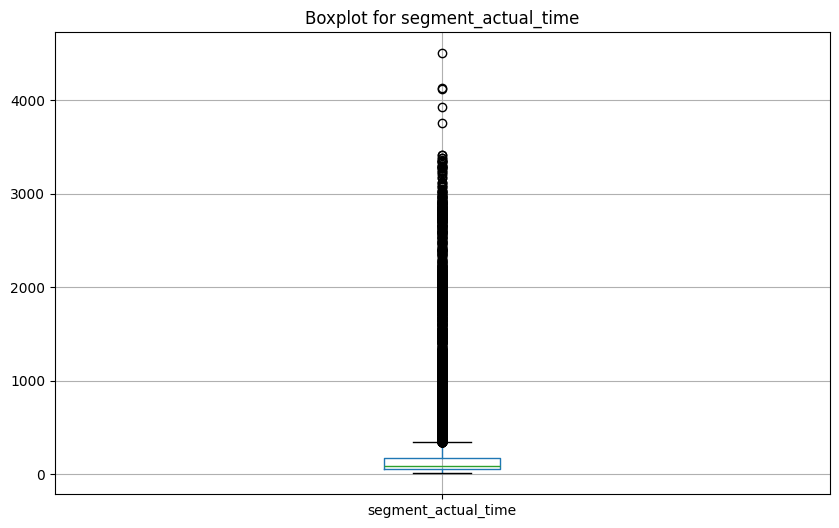

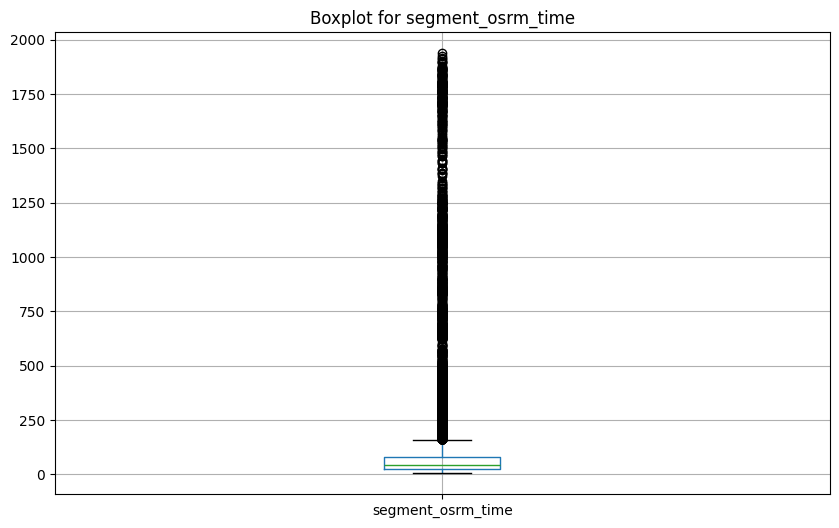

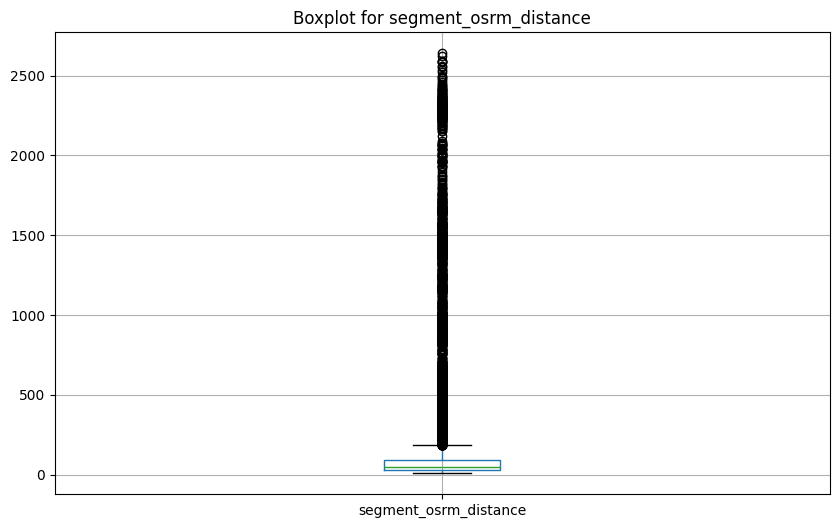

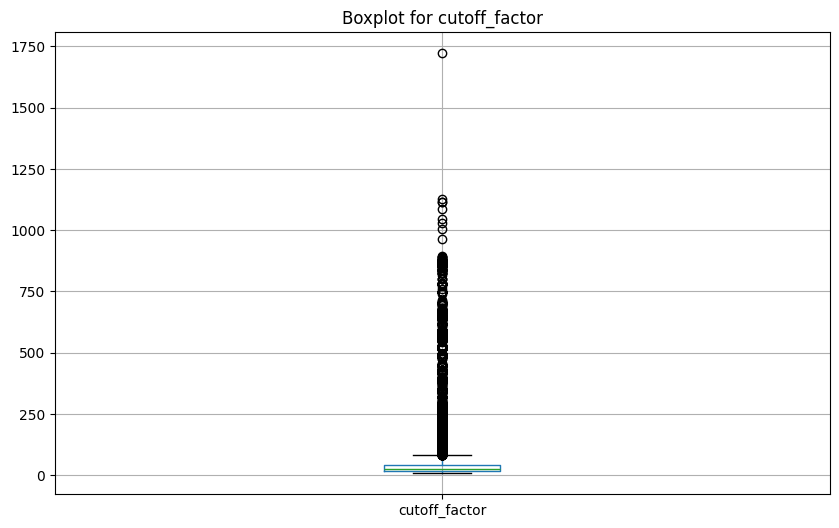

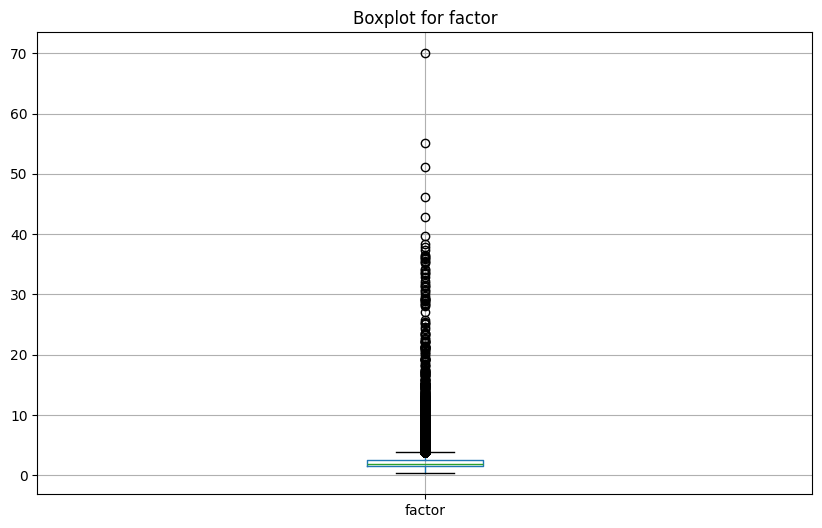

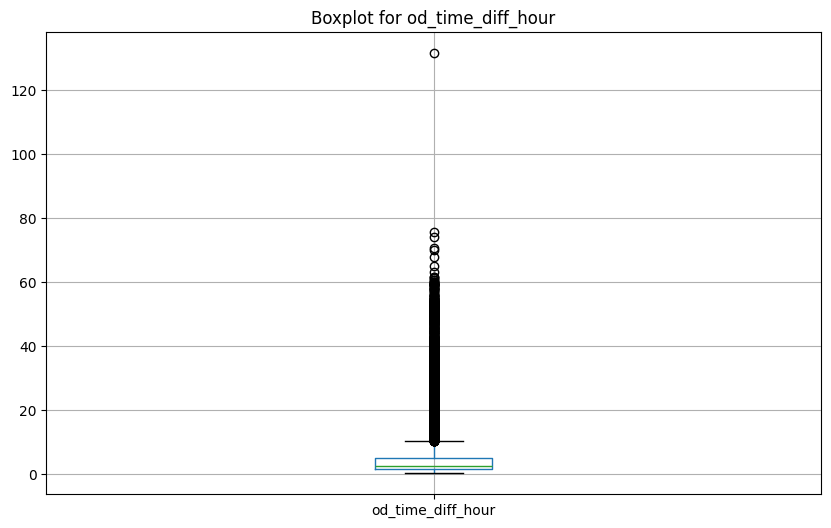

In [ ]:

# Identify numerical columns
numerical_columns = sorted_data.select_dtypes(include=['float64', 'int64']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers for all numerical columns
outliers_dict = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(sorted_data, column)
    if not outliers.empty:
        outliers_dict[column] = outliers
        print(f"Outliers detected in column '{column}': {len(outliers)}")

# Visualize outliers using boxplots
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sorted_data.boxplot(column=column)
    plt.title(f"Boxplot for {column}")
    plt.show()


**c. Handle the outliers using the IQR method.**

In [ ]:
# Function to handle outliers using IQR
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Identify numerical columns
numerical_columns = sorted_data.select_dtypes(include=['float64', 'int64']).columns

# Apply the IQR method to all numerical columns
for column in numerical_columns:
    print(f"Handling outliers for column: {column}")
    handle_outliers_iqr(sorted_data, column)

# Check the dataset after handling outliers
print("Outliers handled successfully.")
print(sorted_data.describe())


Handling outliers for column: segment_actual_time
Handling outliers for column: segment_osrm_time
Handling outliers for column: segment_osrm_distance
Handling outliers for column: cutoff_factor
Handling outliers for column: factor
Handling outliers for column: od_time_diff_hour
Outliers handled successfully.
       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
count         26368.000000       26368.000000           26368.000000   
mean            124.866050          60.379703              69.080303   
min               9.000000           6.000000               9.072900   
25%              50.000000          25.000000              28.471300   
50%              83.000000          42.000000              45.944400   
75%             166.000000          79.000000              91.351975   
max             340.000000         160.000000             185.672987   
std             101.295889          47.490892              55.290635   

                  trip_creation_time  cut

***5. Hypothesis Testing:***

**1. Perform hypothesis testing / visual analysis between :**

**a. Actual_time aggregated value and OSRM time aggregated value.**

***Null and Alternative Hypotheses***
**Null Hypothesis (H₀): The mean of actual_time and osrm_time are equal.**


**Alternative Hypothesis (H₁): The mean of actual_time and osrm_time are not equal.**


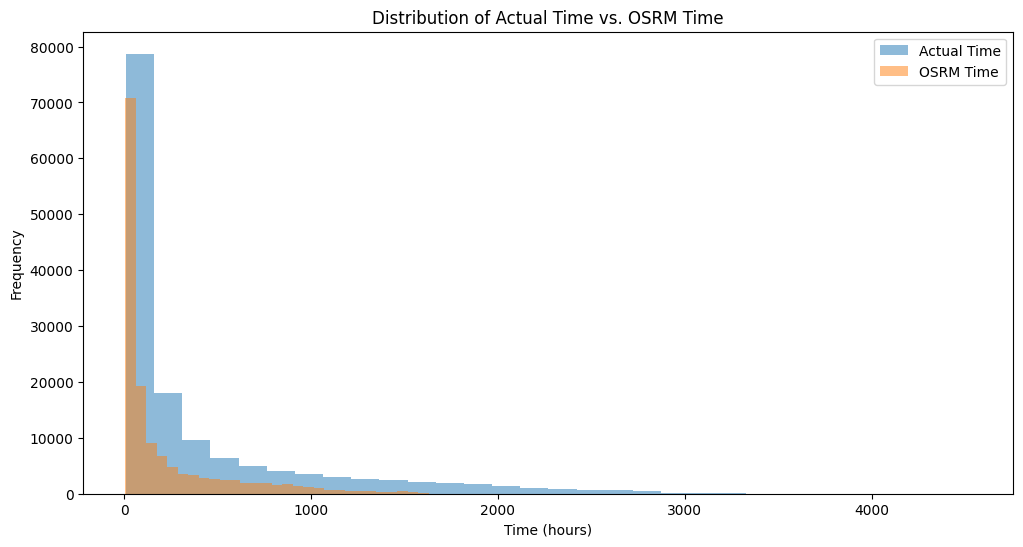

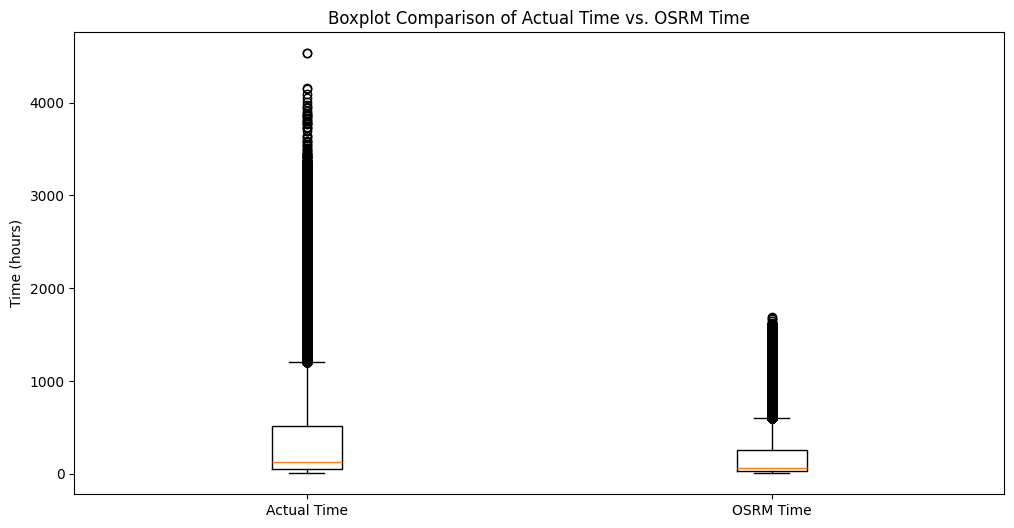

Paired T-Test Results:
T-Statistic: 254.449, P-Value: 0.000
Reject the null hypothesis: There is a significant difference between Actual Time and OSRM Time.


In [ ]:
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

# Check for required columns
if 'actual_time' in df.columns and 'osrm_time' in df.columns:
    # Extract the two columns
    actual_time = df['actual_time']
    osrm_time = df['osrm_time']

    # Visual Analysis
    plt.figure(figsize=(12, 6))
    plt.hist(actual_time, bins=30, alpha=0.5, label='Actual Time')
    plt.hist(osrm_time, bins=30, alpha=0.5, label='OSRM Time')
    plt.title('Distribution of Actual Time vs. OSRM Time')
    plt.xlabel('Time (hours)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.boxplot([actual_time, osrm_time], labels=['Actual Time', 'OSRM Time'])
    plt.title('Boxplot Comparison of Actual Time vs. OSRM Time')
    plt.ylabel('Time (hours)')
    plt.show()

    # Perform Paired T-Test
    t_stat, p_value = ttest_rel(actual_time, osrm_time)
    print("Paired T-Test Results:")
    print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

    # Interpret the result
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between Actual Time and OSRM Time.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between Actual Time and OSRM Time.")
else:
    print("Columns 'actual_time' and/or 'osrm_time' are missing from the dataset.")


**b. Actual_time aggregated value and segment actual time aggregated
value.**

**Null and Alternative Hypotheses**

**Null Hypothesis (H₀): The mean of actual_time and segment_actual_time are equal.**

**Alternative Hypothesis (H₁): The mean of actual_time and segment_actual_time are not equal.**

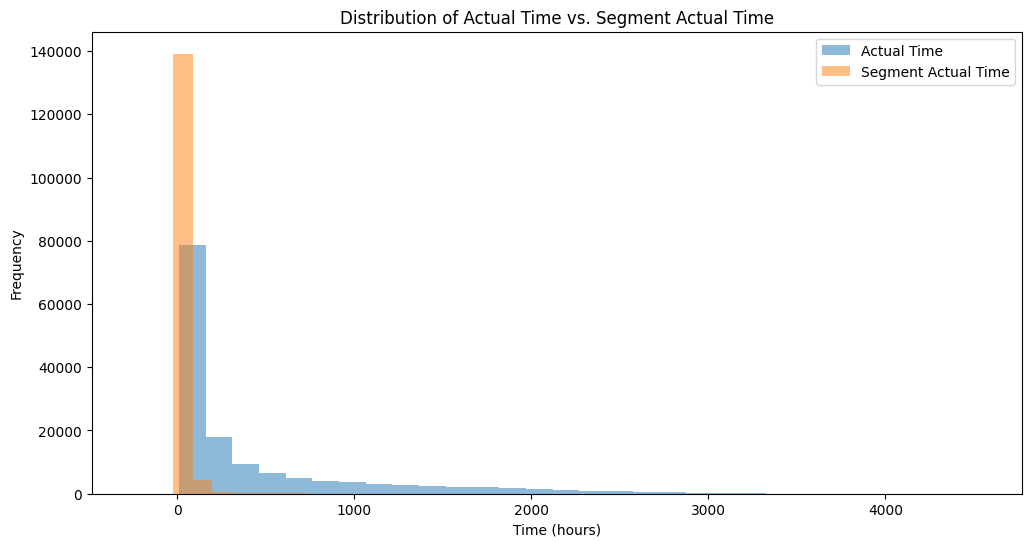

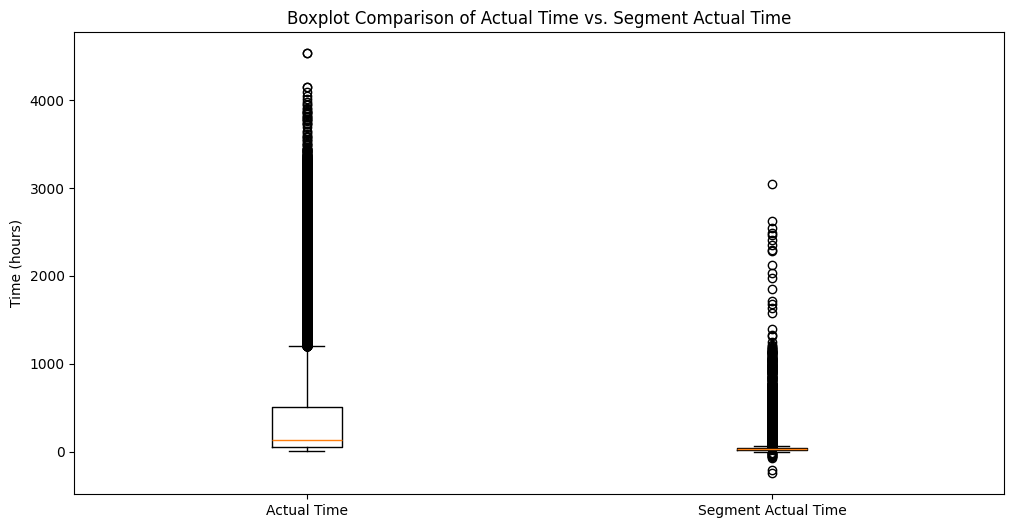

Paired T-Test Results:
T-Statistic: 244.032, P-Value: 0.000
Reject the null hypothesis: There is a significant difference between Actual Time and Segment Actual Time.


In [ ]:
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

# Check for required columns
if 'actual_time' in df.columns and 'segment_actual_time' in df.columns:
    # Extract the two columns
    actual_time = df['actual_time']
    segment_actual_time = df['segment_actual_time']

    # Visual Analysis
    plt.figure(figsize=(12, 6))
    plt.hist(actual_time, bins=30, alpha=0.5, label='Actual Time')
    plt.hist(segment_actual_time, bins=30, alpha=0.5, label='Segment Actual Time')
    plt.title('Distribution of Actual Time vs. Segment Actual Time')
    plt.xlabel('Time (hours)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.boxplot([actual_time, segment_actual_time], labels=['Actual Time', 'Segment Actual Time'])
    plt.title('Boxplot Comparison of Actual Time vs. Segment Actual Time')
    plt.ylabel('Time (hours)')
    plt.show()

    # Perform Paired T-Test
    t_stat, p_value = ttest_rel(actual_time, segment_actual_time)
    print("Paired T-Test Results:")
    print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

    # Interpret the result
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between Actual Time and Segment Actual Time.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between Actual Time and Segment Actual Time.")
else:
    print("Columns 'actual_time' and/or 'segment_actual_time' are missing from the dataset.")


***c. OSRM distance aggregated value and segment OSRM distance
aggregated value.***

**Null Hypothesis (H₀): The mean of osrm_distance and segment_osrm_distance are equal.**

**Alternative Hypothesis (H₁): The mean of osrm_distance and segment_osrm_distance are not equal.**

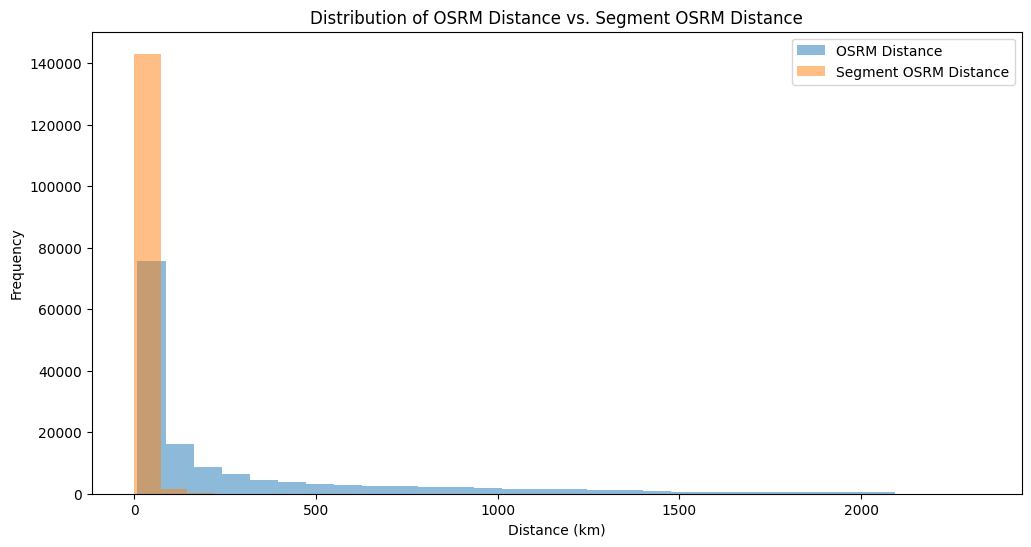

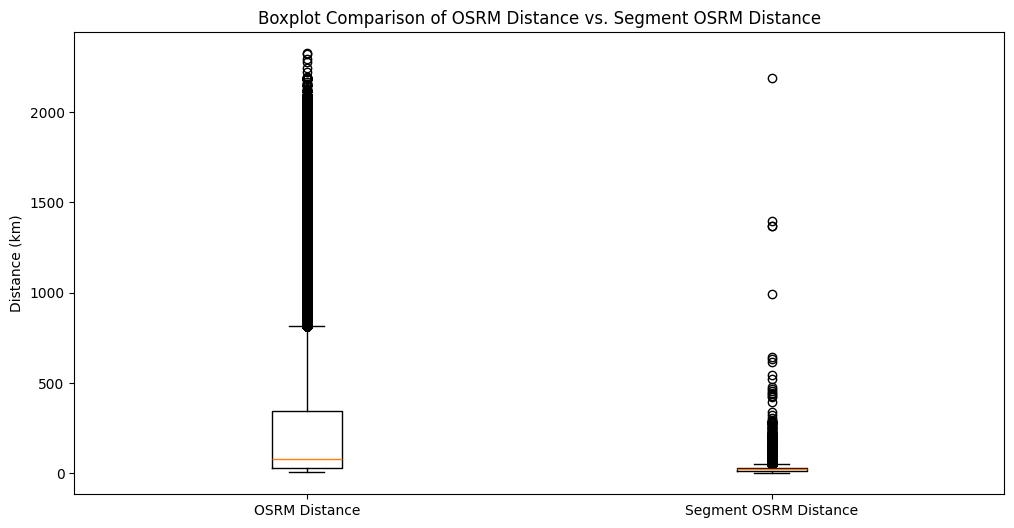

Paired T-Test Results:
T-Statistic: 238.972, P-Value: 0.000
Reject the null hypothesis: There is a significant difference between OSRM Distance and Segment OSRM Distance.


In [ ]:
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

# Check for required columns
if 'osrm_distance' in df.columns and 'segment_osrm_distance' in df.columns:
    # Extract the two columns
    osrm_distance = df['osrm_distance']
    segment_osrm_distance = df['segment_osrm_distance']

    # Visual Analysis
    plt.figure(figsize=(12, 6))
    plt.hist(osrm_distance, bins=30, alpha=0.5, label='OSRM Distance')
    plt.hist(segment_osrm_distance, bins=30, alpha=0.5, label='Segment OSRM Distance')
    plt.title('Distribution of OSRM Distance vs. Segment OSRM Distance')
    plt.xlabel('Distance (km)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.boxplot([osrm_distance, segment_osrm_distance], labels=['OSRM Distance', 'Segment OSRM Distance'])
    plt.title('Boxplot Comparison of OSRM Distance vs. Segment OSRM Distance')
    plt.ylabel('Distance (km)')
    plt.show()

    # Perform Paired T-Test
    t_stat, p_value = ttest_rel(osrm_distance, segment_osrm_distance)
    print("Paired T-Test Results:")
    print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

    # Interpret the result
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between OSRM Distance and Segment OSRM Distance.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between OSRM Distance and Segment OSRM Distance.")
else:
    print("Columns 'osrm_distance' and/or 'segment_osrm_distance' are missing from the dataset.")


**d. OSRM time aggregated value and segment OSRM time aggregated
value.**

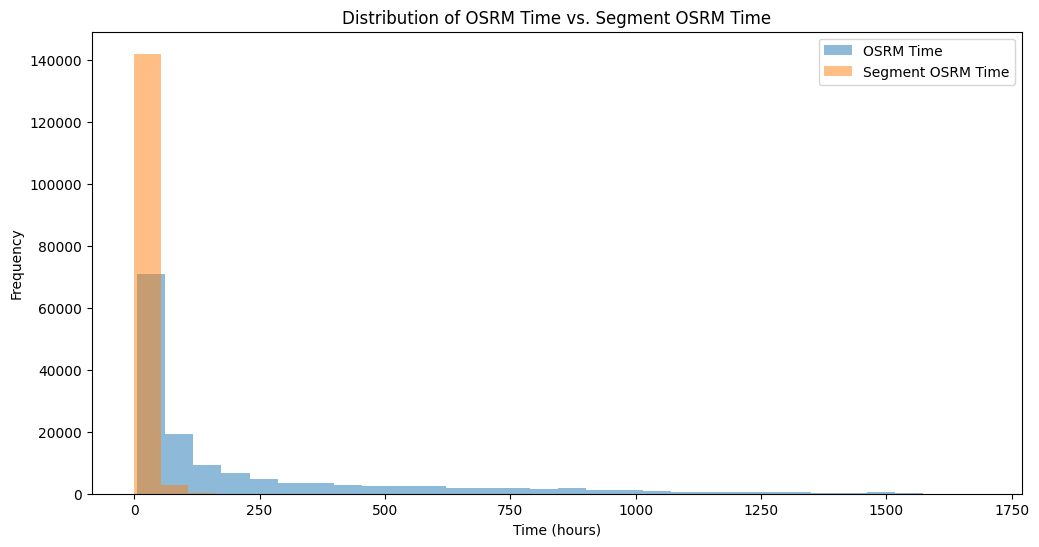

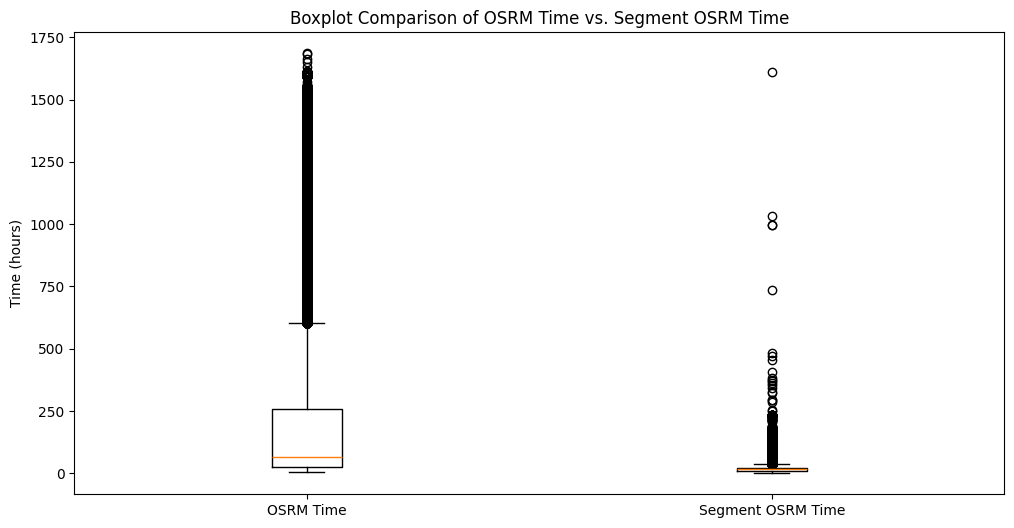

Paired T-Test Results:
T-Statistic: 243.203, P-Value: 0.000
Reject the null hypothesis: There is a significant difference between OSRM Time and Segment OSRM Time.


In [ ]:
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

# Check for required columns
if 'osrm_time' in df.columns and 'segment_osrm_time' in df.columns:
    # Extract the two columns
    osrm_time = df['osrm_time']
    segment_osrm_time = df['segment_osrm_time']

    # Visual Analysis
    plt.figure(figsize=(12, 6))
    plt.hist(osrm_time, bins=30, alpha=0.5, label='OSRM Time')
    plt.hist(segment_osrm_time, bins=30, alpha=0.5, label='Segment OSRM Time')
    plt.title('Distribution of OSRM Time vs. Segment OSRM Time')
    plt.xlabel('Time (hours)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.boxplot([osrm_time, segment_osrm_time], labels=['OSRM Time', 'Segment OSRM Time'])
    plt.title('Boxplot Comparison of OSRM Time vs. Segment OSRM Time')
    plt.ylabel('Time (hours)')
    plt.show()

    # Perform Paired T-Test
    t_stat, p_value = ttest_rel(osrm_time, segment_osrm_time)
    print("Paired T-Test Results:")
    print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

    # Interpret the result
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between OSRM Time and Segment OSRM Time.")
    else:
        print("Fail to reject the null hypothesis: No significant difference between OSRM Time and Segment OSRM Time.")
else:
    print("Columns 'osrm_time' and/or 'segment_osrm_time' are missing from the dataset.")


***6. Business Insights & Recommendations***

**Patterns observed in the data along with what you can infer from them.**

**Check from where most orders are coming from (State, Corridor, etc.)**

In [ ]:
# Extract state and city from 'source_name'
df[['city_source', 'state_source']] = df['source_name'].str.extract(r'^(.*?)(?:_.*)?\s*\((.*?)\)$')

# Extract state and city from 'destination_name'
df[['city_destination', 'state_destination']] = df['destination_name'].str.extract(r'^(.*?)(?:_.*)?\s*\((.*?)\)$')

# Display the updated DataFrame
print(df.head())


       data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VU

Top States by Source:
  State_Source  Order_Count
0      Haryana        27499
1  Maharashtra        21401
2    Karnataka        19578
3   Tamil Nadu         7494
4      Gujarat         7202

Top States by Destination:
  State_Destination  Order_Count
0         Karnataka        21065
1           Haryana        20622
2       Maharashtra        18196
3       West Bengal         8499
4         Telangana         8205

Top Corridors:
                         Corridor  Order_Count
0      Maharashtra -> Maharashtra        11876
1          Karnataka -> Karnataka        11107
2        Tamil Nadu -> Tamil Nadu         6549
3  Uttar Pradesh -> Uttar Pradesh         4978
4            Haryana -> Karnataka         4976


<ipython-input-78-6f14d23001a3>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order_Count', y='State_Source', data=state_source_orders.head(10), palette="viridis")


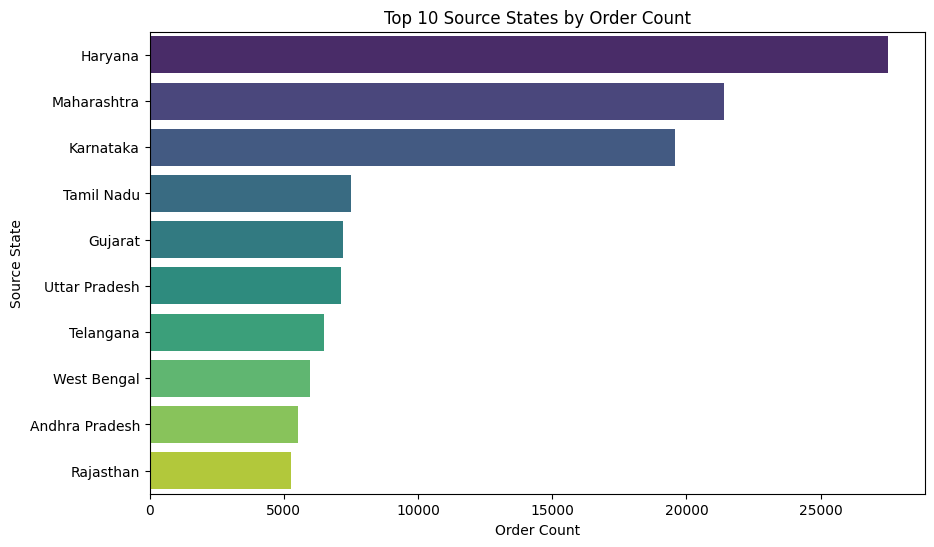

<ipython-input-78-6f14d23001a3>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order_Count', y='Corridor', data=corridor_orders.head(10), palette="coolwarm")


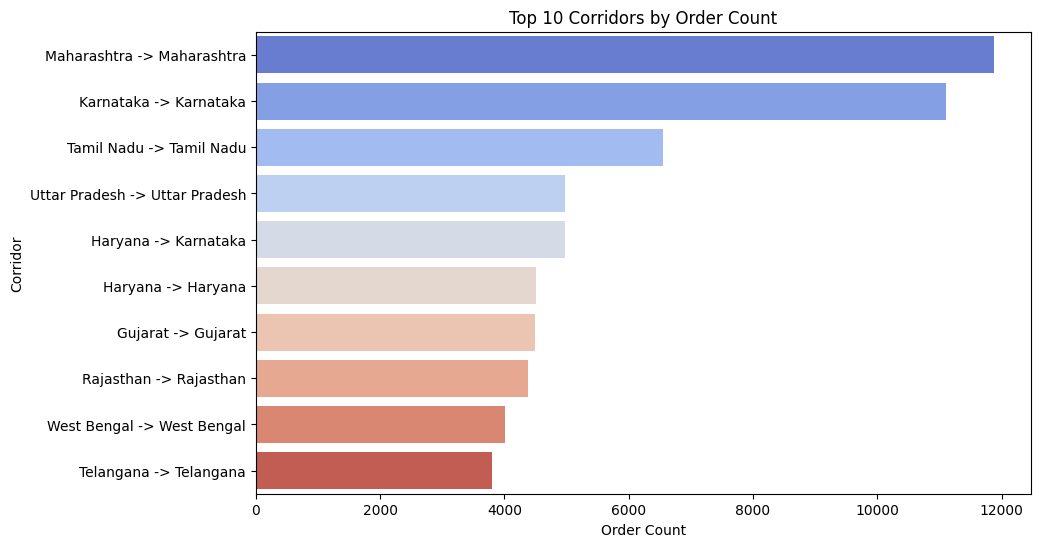

In [ ]:
# Check most orders by state (source)
state_source_orders = df['state_source'].value_counts().reset_index()
state_source_orders.columns = ['State_Source', 'Order_Count']
print("Top States by Source:")
print(state_source_orders.head())

# Check most orders by state (destination)
state_destination_orders = df['state_destination'].value_counts().reset_index()
state_destination_orders.columns = ['State_Destination', 'Order_Count']
print("\nTop States by Destination:")
print(state_destination_orders.head())

# Create a corridor column (combination of source and destination states)
df['corridor'] = df['state_source'] + " -> " + df['state_destination']

# Check most orders by corridor
corridor_orders = df['corridor'].value_counts().reset_index()
corridor_orders.columns = ['Corridor', 'Order_Count']
print("\nTop Corridors:")
print(corridor_orders.head())

# Optional: Visualize the top states and corridors
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Source States
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Count', y='State_Source', data=state_source_orders.head(10), palette="viridis")
plt.title("Top 10 Source States by Order Count")
plt.xlabel("Order Count")
plt.ylabel("Source State")
plt.show()

# Top 10 Corridors
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Count', y='Corridor', data=corridor_orders.head(10), palette="coolwarm")
plt.title("Top 10 Corridors by Order Count")
plt.xlabel("Order Count")
plt.ylabel("Corridor")
plt.show()


**Key Insights:**

**Top Source States:**

Haryana leads with the highest order count (27,499 orders). This suggests that Haryana could be a major hub or center for the business, and this region might have high demand.

Maharashtra and Karnataka follow closely with significant order volumes, implying that these states contribute to a large portion of the overall traffic.

Tamil Nadu and Gujarat have moderate order volumes but still play an essential role in the supply chain.


**Top Destination States:**

Karnataka is the leading destination state with 21,065 orders, closely followed by Haryana (20,622 orders), indicating these two states are major receiving regions for orders.

Maharashtra and West Bengal also contribute to a significant number of orders being sent to them.

**Top Corridors:**

Maharashtra -> Maharashtra (11,876 orders) and Karnataka -> Karnataka (11,107 orders) stand out as the busiest corridors. This suggests there may be internal flows within these states (perhaps within the same state distribution centers or between different parts of the state).

Tamil Nadu -> Tamil Nadu and Uttar Pradesh -> Uttar Pradesh suggest internal movement within the same state, which might reflect local or regional distribution processes.

Haryana -> Karnataka indicates a significant interstate movement, suggesting a possible supply-demand imbalance or special logistical requirements between these states.

**Actionable Analysis:**

**Focus on Haryana as a Major Hub:**

Since Haryana contributes the highest number of orders, it's essential to ensure efficient operations in this region.

Improving logistics in Haryana, expanding the number of distribution centers or warehouses, or ensuring better inventory management can help cater to the high demand and avoid potential bottlenecks.

Optimize Routes for Major Corridors:

The corridors from Maharashtra to Maharashtra, Karnataka to Karnataka, and Tamil Nadu to Tamil Nadu suggest a high volume of internal movements. These corridors might benefit from route optimization, reduced lead times, and better traffic forecasting.

For Haryana to Karnataka, since this is an interstate corridor, understanding the logistical challenges (such as road conditions, regional regulations, and transportation types) could lead to improved time and cost efficiency.

**Improve Supply Chain in Top Destination States:**

Karnataka, as the top destination, will likely need stronger distribution and delivery infrastructure. This might involve improving delivery times or reducing the delivery cost through more efficient local distribution methods.
Maharashtra and West Bengal should also be targeted for improved distribution to meet demand in these states.

**Focus on the Busiest Corridors for Network Expansion:**

High-frequency corridors like Maharashtra -> Maharashtra, Karnataka -> Karnataka, and Haryana -> Karnataka could benefit from dedicated vehicles or time slots to reduce congestion and improve delivery speed.

These corridors might also require a review of whether the current capacity is sufficient to meet demand and where additional capacity (vehicles, warehouse space, etc.) can be added.

**Monitor Growing Corridors:**

Pay attention to corridors like Haryana -> Karnataka, which may have a growing trend. These corridors may require forecasting for increased volume, special offers, or optimized transportation routes to address future demand.
Route Expansion:

If the analysis reveals that certain regions consistently receive more orders, such as Karnataka or Haryana, there may be an opportunity for businesses to expand into these regions further by establishing more physical locations or partnering with local businesses for better reach.

**Summary of Key Inputs:**

**Key States for Business Focus:**

Haryana, Maharashtra, and Karnataka are crucial. These states should be prioritized for operational improvements, investment, and further expansion.
Efficient Route Planning:

Focus on optimizing internal state-to-state routes, particularly in high-volume corridors like Maharashtra -> Maharashtra, Karnataka -> Karnataka, and Haryana -> Karnataka.

**Targeting Destination States for Expansion:**

States like Karnataka, Maharashtra, and West Bengal will require better infrastructure to handle the large volume of incoming orders.

**Local Distribution Strategy:**

Understanding the local logistics and internal state distribution mechanisms, particularly in regions with high order volumes, is critical for improving efficiency.

**Busiest corridor, avg distance between them, avg time taken, etc.**


Busiest Corridor:
          corridor  actual_distance_to_destination  actual_time  \
22  Delhi -> Assam                      759.661163  1861.867647   

    osrm_distance   osrm_time  segment_actual_time  start_scan_to_end_scan  
22     952.486291  684.397059                48.25                  3702.0  


<ipython-input-79-97c376d35644>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='actual_time', y='corridor', data=corridor_metrics.sort_values(by='actual_time', ascending=False).head(10), palette="coolwarm")


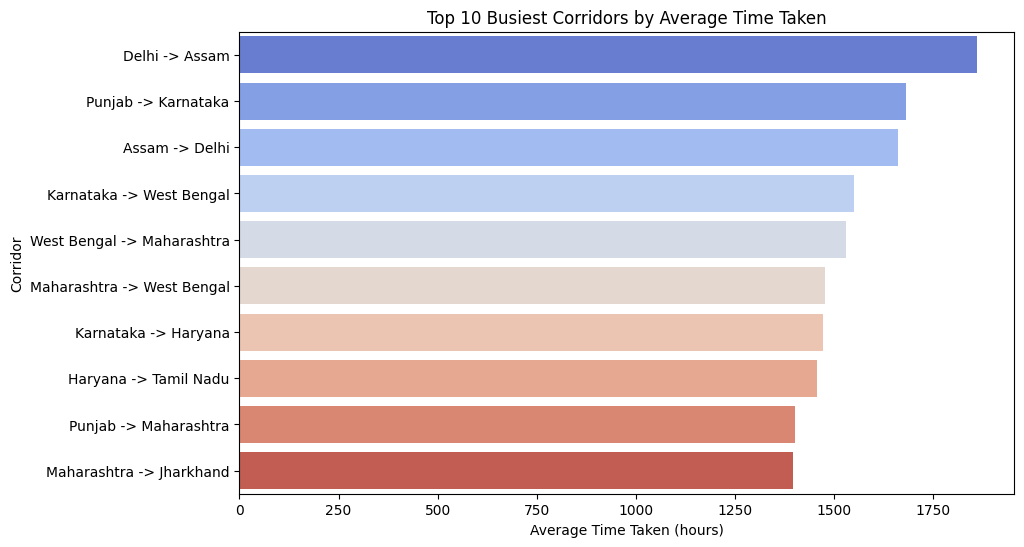

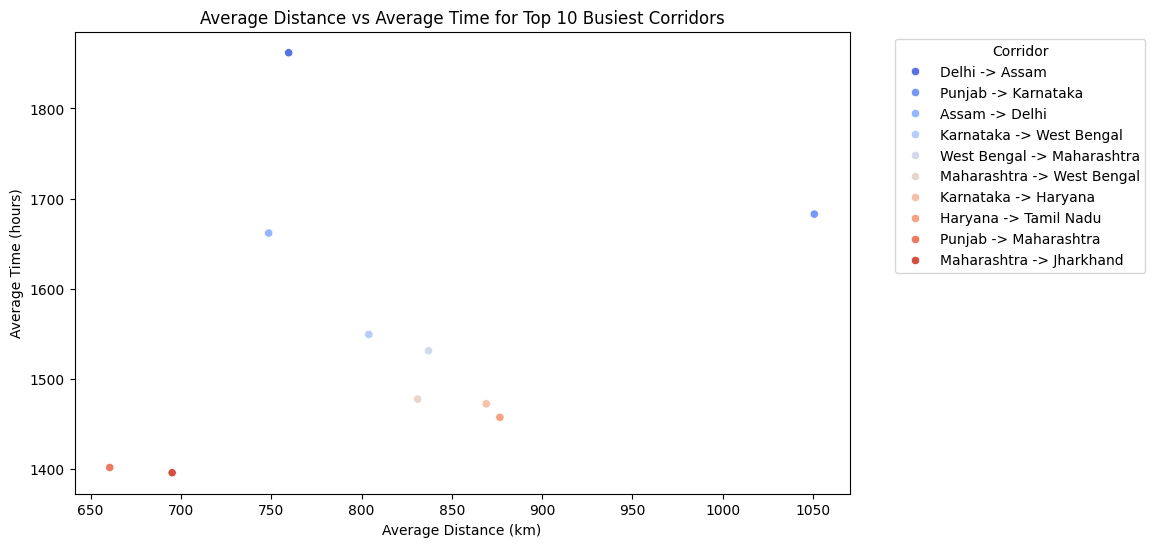

In [ ]:
# Create a 'corridor' column combining 'state_source' and 'state_destination'
df['corridor'] = df['state_source'] + " -> " + df['state_destination']

# Aggregate by 'corridor' to calculate metrics like sum and mean for distance, time, etc.
corridor_metrics = df.groupby('corridor').agg({
    'actual_distance_to_destination': 'mean',  # Average distance
    'actual_time': 'mean',  # Average time
    'osrm_distance': 'mean',  # Average OSRM distance
    'osrm_time': 'mean',  # Average OSRM time
    'segment_actual_time': 'mean',  # Average segment time
    'start_scan_to_end_scan': 'mean',  # Average time from scan to end
}).reset_index()

# Sort by 'segment_actual_time' or 'actual_time' to find the busiest corridor
busiest_corridor = corridor_metrics.sort_values(by='actual_time', ascending=False).head(1)

# Display the busiest corridor and its metrics
print("Busiest Corridor:")
print(busiest_corridor)

# Optional: Visualize the busiest corridor based on actual_time
plt.figure(figsize=(10, 6))
sns.barplot(x='actual_time', y='corridor', data=corridor_metrics.sort_values(by='actual_time', ascending=False).head(10), palette="coolwarm")
plt.title("Top 10 Busiest Corridors by Average Time Taken")
plt.xlabel("Average Time Taken (hours)")
plt.ylabel("Corridor")
plt.show()

# Visualize average distance vs. average time for top 10 busiest corridors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_distance_to_destination', y='actual_time', data=corridor_metrics.sort_values(by='actual_time', ascending=False).head(10), hue='corridor', palette="coolwarm")
plt.title("Average Distance vs Average Time for Top 10 Busiest Corridors")
plt.xlabel("Average Distance (km)")
plt.ylabel("Average Time (hours)")
plt.legend(title="Corridor", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Key Insights from the Busiest Corridor Data:**

**Corridors with High Volume:**

Delhi -> Assam is the busiest corridor, with a significant number of orders. This is also reflected in the actual distance to destination (759.66 km) and the actual time (1861.87 minutes or approximately 31 hours). This long distance and time indicate the importance of optimizing operations in this corridor.
Punjab -> Karnataka and Assam -> Delhi are also important corridors, showing high order volumes. Other corridors like Karnataka -> Haryana and Maharashtra -> Jharkhand also exhibit busy routes that need attention.

**Distance vs Time Analysis:**

The actual distance and OSRM distance for the Delhi -> Assam corridor suggest a discrepancy (759.66 km vs 952.49 km). This could indicate a longer route taken by actual shipments compared to the OSRM (optimal) distance, which implies that there might be inefficiencies in the routing system.

The actual time of 1861.87 minutes compared to the OSRM time of 684.4 minutes suggests significant delays or inefficiencies in the delivery process, potentially due to road conditions, traffic, or route planning inefficiencies.

**Segment Time and Scan Time:**

The segment actual time of 48.25 minutes indicates the duration spent per segment of the delivery. Comparing this with the start scan to end scan time (3702 minutes, or roughly 61 hours), it suggests that a significant amount of time is spent on scanning and possibly waiting, rather than actual movement. This could indicate inefficiencies in the handling process at various stages.
Actionable Analysis:

**Optimize Route Efficiency:**

For corridors like Delhi -> Assam, the difference between actual distance and OSRM distance (952.49 km vs 759.66 km) suggests that there is potential for reducing the distance and improving delivery efficiency. This can be achieved by using more advanced routing algorithms or by re-evaluating the routes taken.
Use real-time traffic data and geospatial tools to optimize the path for long-distance corridors, ensuring that the actual travel time is closer to the optimal OSRM time.

**Address Time Delays:**

The discrepancy between actual time (1861.87 minutes) and OSRM time (684.4 minutes) suggests a need to investigate potential reasons for delays in transit. Focus on road conditions, vehicle maintenance, and driver performance to minimize delays.

Consider integrating advanced technologies like AI-based predictive analytics for traffic forecasting and route adjustments to minimize delays.
Improve Scanning Process:

The long start scan to end scan time (3702 minutes) relative to segment actual time (48.25 minutes) suggests inefficiencies in scanning or waiting times. Optimizing or automating these processes with better inventory management systems or quicker scanning methods could significantly reduce delays.
Increase Fleet and Logistics Support on Busiest Corridors:

Given the high volume of traffic on the Delhi -> Assam corridor, it may be beneficial to dedicate more fleet resources and optimize the supply chain in this region. This could involve increasing the number of vehicles, establishing more distribution centers, or enhancing local logistics support.
Focus on Continuous Monitoring and Feedback:

Continuous monitoring of the busiest corridors will be critical to proactively address issues that could impact the efficiency of the supply chain. Analyzing patterns and outliers in time delays, distances, and segment durations will help identify bottlenecks and areas for improvement.
Feedback from drivers, logistics teams, and local partners can also provide valuable insights into practical issues that affect delivery times and distances.

**Key Strategic Recommendations:**

**Corridor-Specific Optimization:**

Consider optimizing the Delhi -> Assam corridor by studying the specific causes of inefficiencies. This could involve analyzing regional traffic patterns, road infrastructure quality, and weather conditions to improve routing accuracy.
Technology Integration:

Implement machine learning or AI-driven systems to dynamically optimize routes based on real-time data. This will allow the system to adapt and improve the efficiency of high-volume corridors like Delhi -> Assam and Punjab -> Karnataka.
Cost Reduction via Time Optimization:

The gap between actual and OSRM times suggests an opportunity to reduce costs. Optimizing the time spent on each segment of the journey by improving traffic management or reducing unnecessary scanning times could lead to significant cost savings.

**Scaling and Resource Allocation:**

Scale operations on the busiest corridors by allocating more resources, such as vehicles and personnel. This will help manage demand efficiently, reduce delays, and improve overall service delivery.

**Actionable items for the business**